# b站-Node2Vec图嵌入

## 参考资料

Elior Cohen代码：https://github.com/eliorc/node2vec

Elior Cohen代码博客：https://maelfabien.github.io/machinelearning/graph_5/#graph-embedding

同济子豪兄：https://space.bilibili.com/1900783

2022-6-29

## 安装工具包

In [1]:
# !pip install node2vec networkx numpy matplotlib

## 导入工具包

In [2]:
import networkx as nx # 图数据挖掘
import numpy as np # 数据分析
import random # 随机数

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
import pandas as pd

## 导入数据集

In [3]:
# 空手道俱乐部数据集
# G = nx.karate_club_graph()

In [4]:
df = pd.read_csv("seealsology-data.tsv", sep = "\t")

In [5]:
df.head()

,source,target,depth
0,support-vector machine,in situ adaptive tabulation,1
1,support-vector machine,kernel machines,1
2,support-vector machine,fisher kernel,1
3,support-vector machine,platt scaling,1
4,support-vector machine,polynomial kernel,1


In [6]:
df.shape

(13211, 3)

In [7]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [8]:
len(G)

8560

In [9]:
# 省略可视化
# plt.figure(figsize=(15,14))
# pos = nx.spring_layout(G, seed=5)
# nx.draw(G, pos, with_labels=False)
# plt.show()

## 构建Node2Vec模型

In [10]:
from node2vec import Node2Vec

In [46]:
for node in list(G.nodes):
    if node != node:  # 判断是否为 nan
        G.remove_node(node)

# 设置node2vec参数
node2vec = Node2Vec(G, 
                    dimensions=256,  # 嵌入维度
                    p=1,            # 回家参数
                    q=0.5,          # 外出参数
                    walk_length=5, # 随机游走最大长度
                    num_walks=100,  # 每个节点作为起始节点生成的随机游走个数
                    workers=4       # 并行线程数
                   )

# p=1, q=0.5, n_clusters=6。DFS深度优先搜索，挖掘同质社群
# p=1, q=2, n_clusters=3。BFS宽度优先搜索，挖掘节点的结构功能。

# 训练Node2Vec，参数文档见 gensim.models.Word2Vec
model = node2vec.fit(window=1,    # Skip-Gram窗口大小
                     min_count=1,  # 忽略出现次数低于此阈值的节点（词）
                     batch_words=4 # 每个线程处理的数据量
                    )
X = model.wv.vectors

Computing transition probabilities:   0%|          | 0/8559 [00:00<?, ?it/s]

In [47]:
X.shape

(8559, 256)

## 查看Embedding

In [48]:
model.wv.get_vector('decision tree').shape

(256,)

In [49]:
# 查看某个节点的Embedding
model.wv.get_vector('decision tree')

array([ 0.18363553, -0.32786453,  0.06149324,  0.44817632,  0.792244  ,
       -0.55372393, -0.44157976,  0.3318583 , -0.26335105,  0.00646598,
        0.07206356, -0.06810949, -0.37875086, -0.4037222 ,  0.23113877,
        0.11988281,  0.3996592 ,  0.45500067, -0.2355752 ,  0.09515108,
       -0.00961976,  0.16654171,  0.22275342, -0.68702406, -0.18924958,
        0.33498213,  0.00191292, -0.25701144,  0.53163147, -0.07501985,
        0.5413782 ,  0.14318861,  0.17846267,  0.5759953 ,  0.0249694 ,
        1.0950315 ,  0.4324378 , -0.12612553,  0.3494611 ,  0.40995413,
       -0.6712536 , -0.27690387,  0.33078277, -0.08423267,  0.90023774,
       -0.19187611,  0.23851676,  0.3515345 , -0.4198838 , -0.08349855,
       -0.10306756,  0.57812107, -0.29050964,  0.20879537, -0.38932624,
       -0.42791265,  0.42211086, -0.9129971 ,  0.10822891, -0.01663579,
       -0.41118422,  0.44725025,  0.2597271 ,  0.18503076,  0.8993691 ,
        0.0376057 ,  0.04191922, -0.26280808,  0.22284804, -0.03

In [50]:
# 查找 相似节点
model.wv.most_similar('decision tree')

[('aanderaa–karp–rosenberg conjecture', 0.7926526069641113),
 ('comparison sort', 0.7685323357582092),
 ('minimum spanning tree', 0.7646906971931458),
 ('decision stump', 0.7547780275344849),
 ('goal structuring notation', 0.7536710500717163),
 ('idef6', 0.7473428845405579),
 ('structured programming', 0.729063868522644),
 ('pseudocode', 0.7280264496803284),
 ('self-documenting code', 0.7273432016372681),
 ("sperner's lemma", 0.7228708863258362)]

In [51]:
# 查看任意两个节点的相似度
model.wv.similarity('decision tree', 'random forest')

0.5851369

## PCA降维可视化

### 可视化全部词条的二维Embedding¶

In [52]:
X = model.wv.vectors

In [53]:
# 将Embedding用PCA降维到2维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)

In [54]:
embed_2d.shape

(8559, 2)

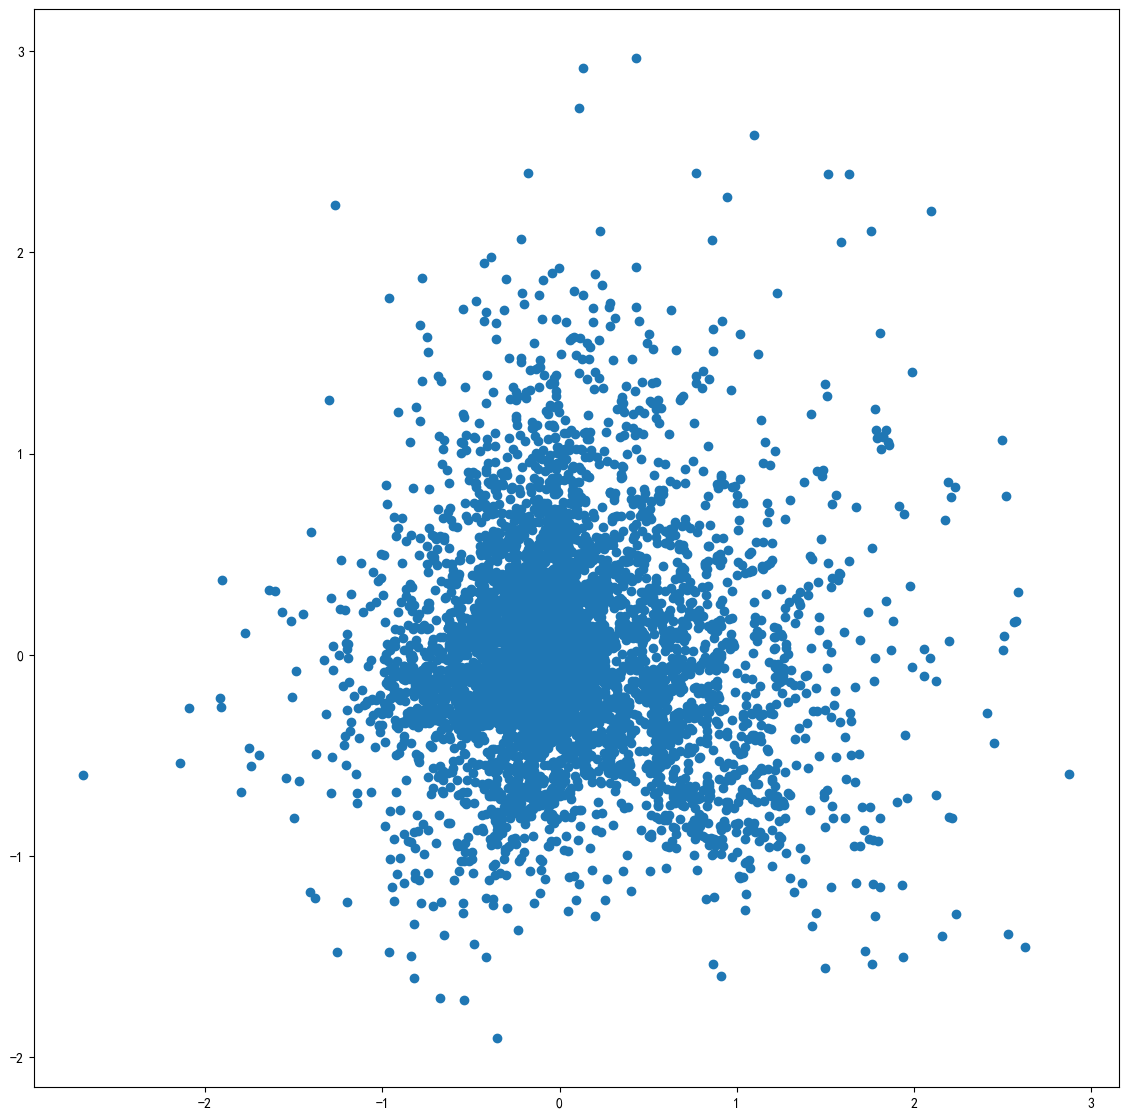

In [55]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

### 可视化某个词条的二维Embedding

In [58]:
term = 'computer vision'

In [59]:
term_256d = model.wv[term].reshape(1,-1)

In [60]:
term_256d.shape

(1, 256)

In [61]:
term_2d = pca.transform(term_256d)

In [62]:
term_2d

array([[ 0.5286711, -0.3696324]], dtype=float32)

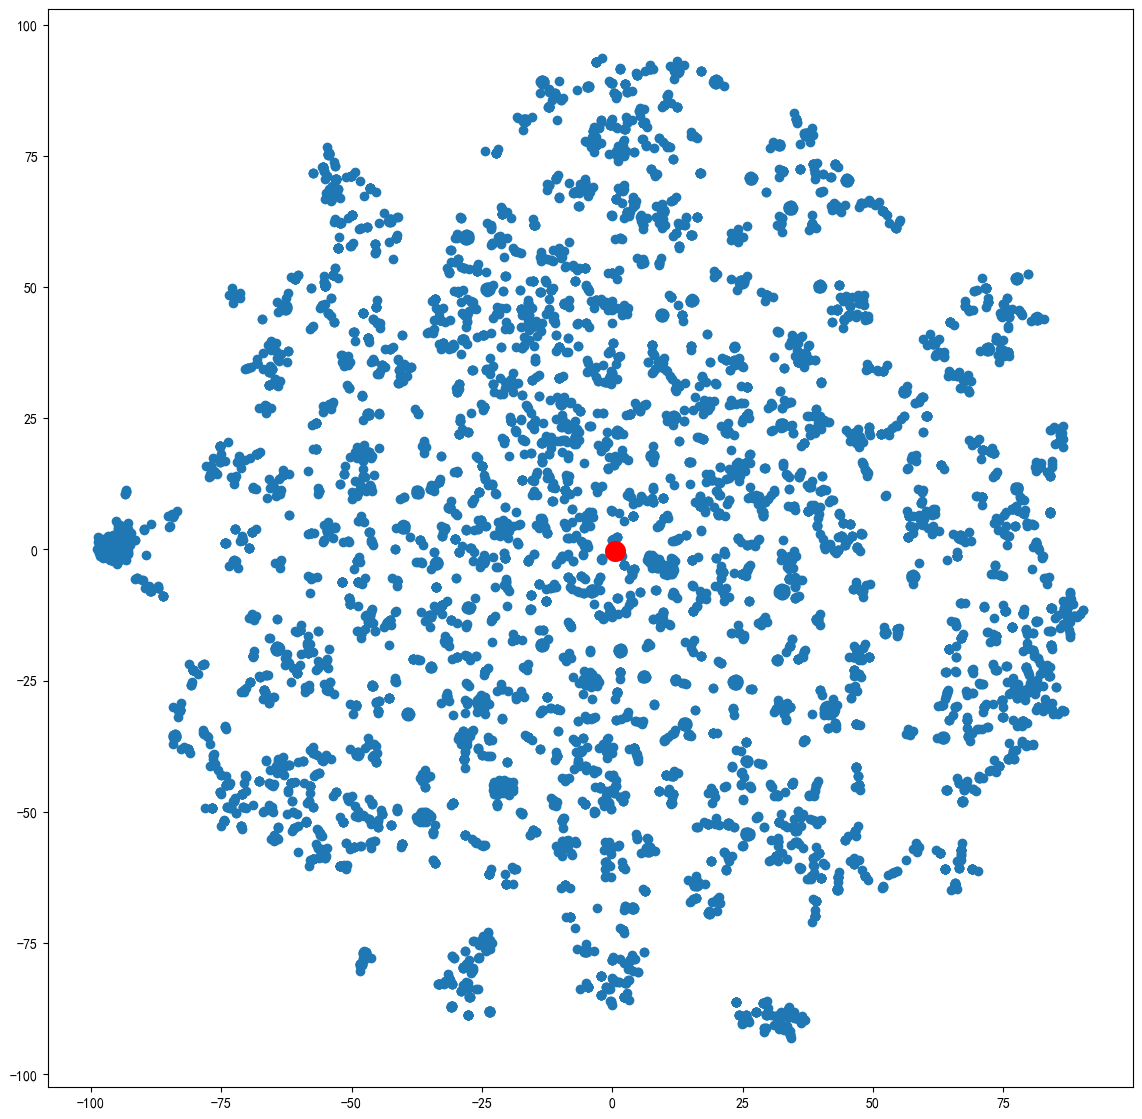

In [63]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])
plt.scatter(term_2d[:,0],term_2d[:,1],c='r',s=200)
plt.show()

### 可视化某些词条的二维Embedding

In [64]:
# 计算PageRank重要度
pagerank = nx.pagerank(G)
# 从高到低排序
node_importance = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)

In [65]:
# 取最高的前n个节点
n = 30
terms_chosen = []
for each in node_importance[:n]:
    terms_chosen.append(each[0])

In [66]:
# 手动补充新节点
terms_chosen.extend(['computer vision','deep learning','convolutional neural network','convolution','natural-language processing','attention (machine learning)','support-vector machine','decision tree','random forest','computational imaging','machine vision','cognitive science','neuroscience','psychophysics','brain','visual cortex','visual neuroscience','cognitive model','finite difference','finite difference time domain','finite difference coefficients','finite difference methods for option pricing','iso 128','iso 10303'])


In [67]:
terms_chosen

['graph theory',
 'chaos theory',
 'claude shannon',
 'information theory',
 'operations research',
 'quantum logic gate',
 'data mining',
 'remote sensing',
 'electromagnetic wave equation',
 'collective intelligence',
 'control theory',
 'fourier transform',
 'empathy',
 'false dilemma',
 'simulated reality',
 'superlens',
 'digital preservation',
 'wearable computer',
 'low-density parity-check code',
 'analytics',
 'spatial dependence',
 'constructed language',
 'correlation',
 'semantic web',
 'psychoacoustics',
 'collaborative software',
 'philosophy of perception',
 'cognitive science',
 'transhumanism',
 'self-awareness',
 'computer vision',
 'deep learning',
 'convolutional neural network',
 'convolution',
 'natural-language processing',
 'attention (machine learning)',
 'support-vector machine',
 'decision tree',
 'random forest',
 'computational imaging',
 'machine vision',
 'cognitive science',
 'neuroscience',
 'psychophysics',
 'brain',
 'visual cortex',
 'visual neurosci

In [68]:
# 输入词条，输出词典中的索引号
term2index = model.wv.key_to_index

In [69]:
# index2term = model.wv.index_to_key
# term_index = np.array(term2index.values())

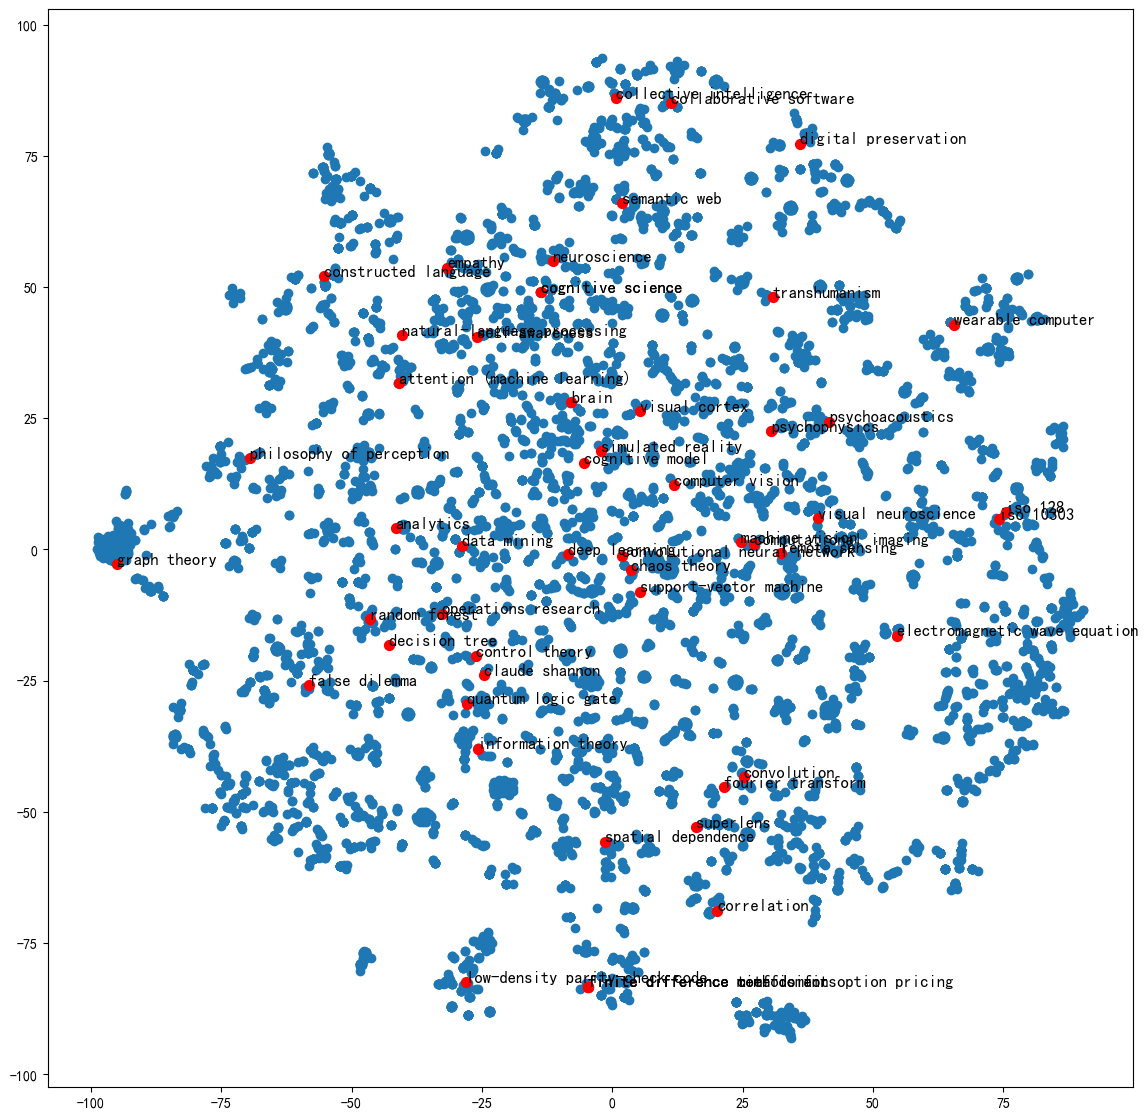

In [70]:
# 可视化全部词条和关键词条的二维Embedding
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])

for item in terms_chosen:
    idx = term2index[item]
    plt.scatter(embed_2d[idx,0], embed_2d[idx,1],c='r',s=50)
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=12)
plt.show()

## TSNE降维可视化

### 可视化全部词条的二维Embedding¶

In [72]:
# 将Embedding用TSNE降维到2维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
embed_2d = tsne.fit_transform(X)

D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


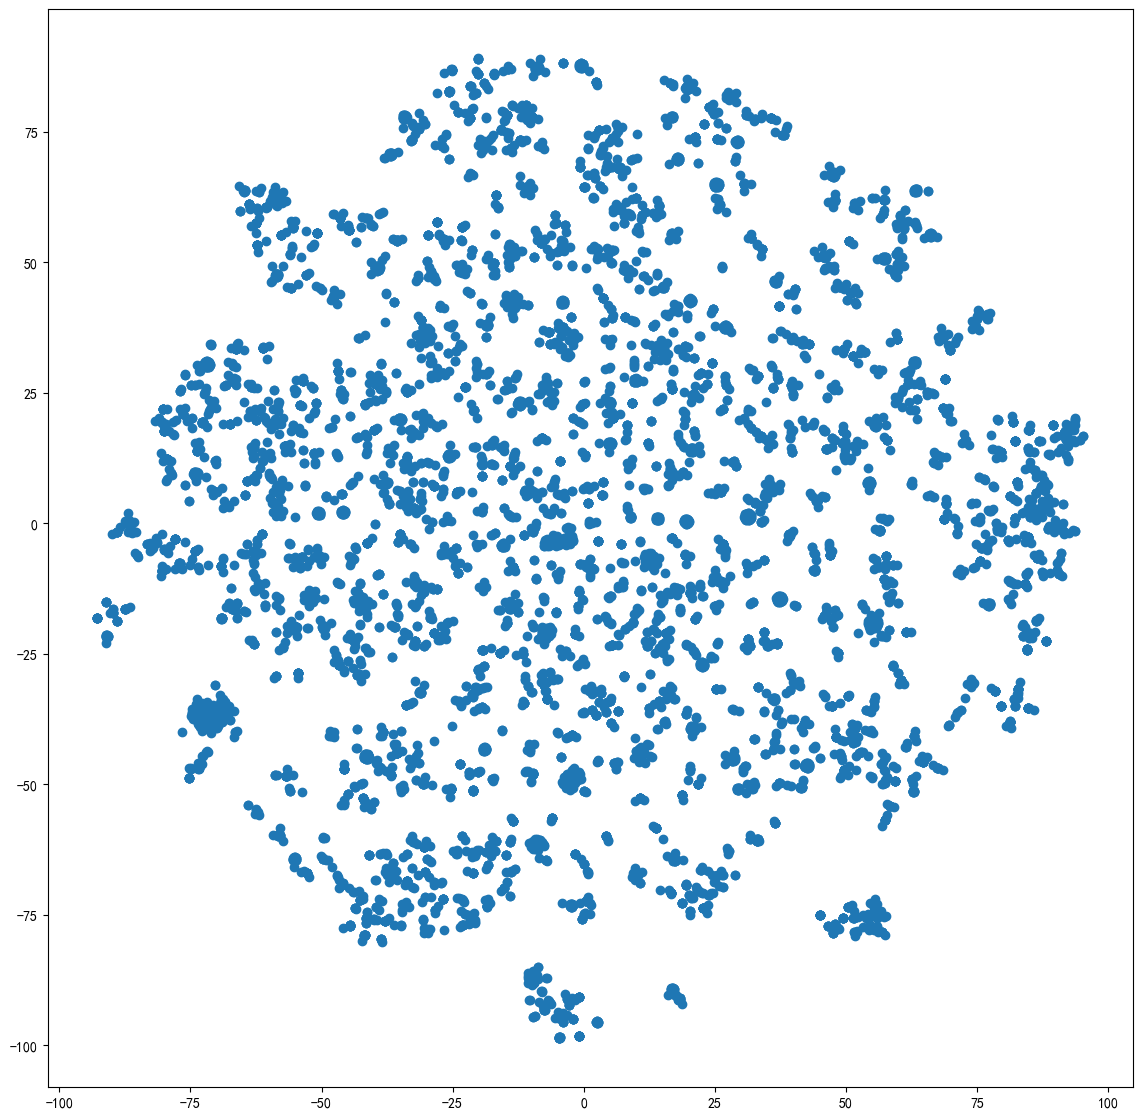

In [73]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

### 可视化某个词条的二维Embedding

In [74]:
term = 'random forest'

In [75]:
term_256d = model.wv[term].reshape(1,-1)

In [76]:
term_256d.shape

(1, 256)

In [77]:
term_2d = pca.transform(term_256d)

In [78]:
term_2d

array([[-0.46890384,  1.7618676 ]], dtype=float32)

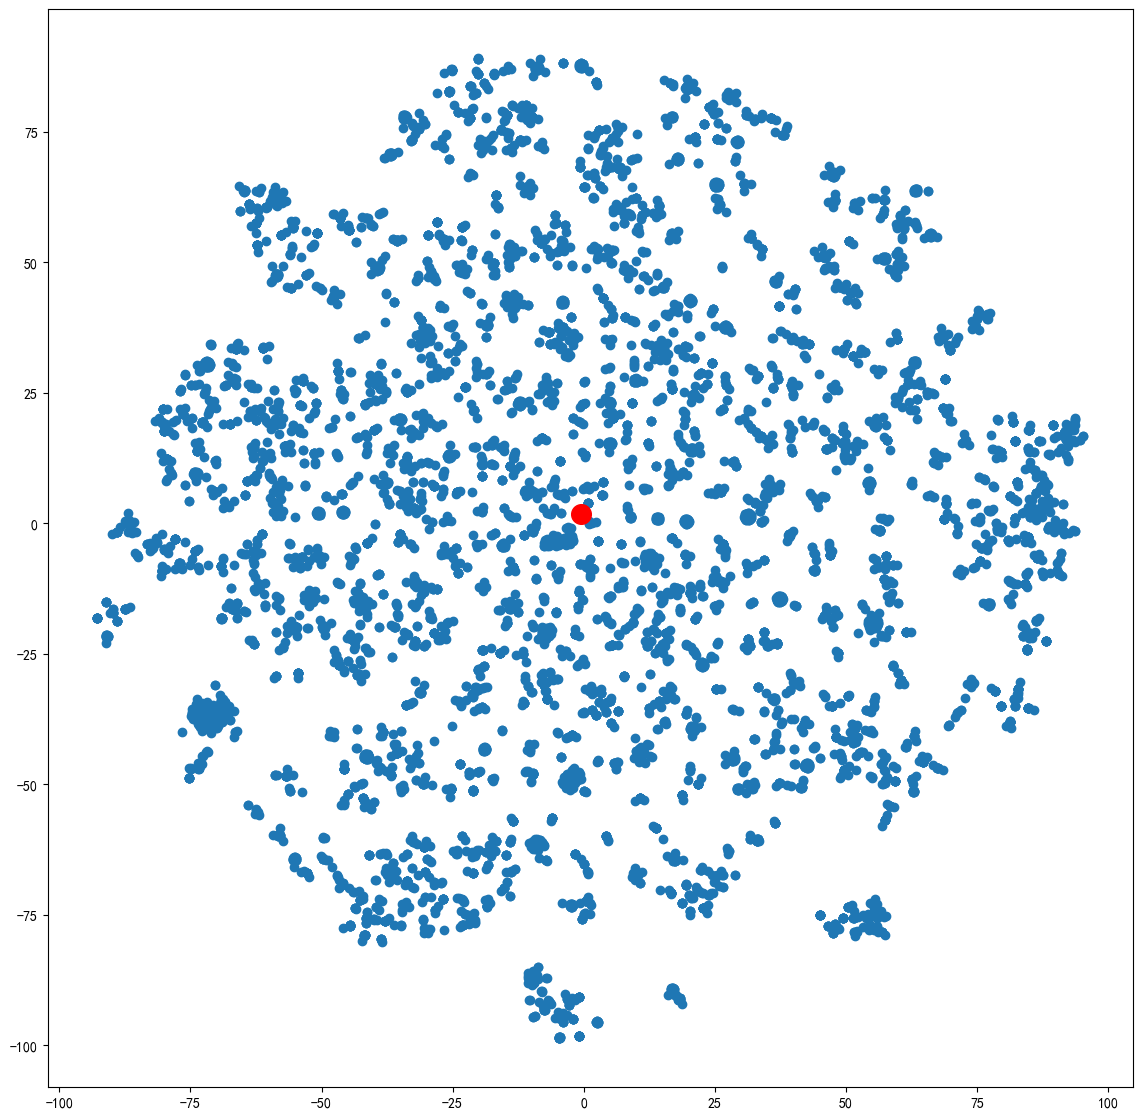

In [79]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])
plt.scatter(term_2d[:,0],term_2d[:,1],c='r',s=200)
plt.show()

### 可视化某些词条的二维Embedding

In [80]:
# 计算PageRank重要度
pagerank = nx.pagerank(G)
# 从高到低排序
node_importance = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)

In [81]:
# 取最高的前n个节点
n = 50
terms_chosen = []
for each in node_importance[:n]:
    terms_chosen.append(each[0])

In [82]:
# 手动补充新节点
terms_chosen.extend(['computer vision','deep learning','convolutional neural network','convolution','natural-language processing','attention (machine learning)','support-vector machine','decision tree','random forest','computational imaging','machine vision','cognitive science','neuroscience','psychophysics','brain','visual cortex','visual neuroscience','cognitive model','finite difference','finite difference time domain','finite difference coefficients','finite difference methods for option pricing','iso 128','iso 10303'])


In [83]:
terms_chosen

['graph theory',
 'chaos theory',
 'claude shannon',
 'information theory',
 'operations research',
 'quantum logic gate',
 'data mining',
 'remote sensing',
 'electromagnetic wave equation',
 'collective intelligence',
 'control theory',
 'fourier transform',
 'empathy',
 'false dilemma',
 'simulated reality',
 'superlens',
 'digital preservation',
 'wearable computer',
 'low-density parity-check code',
 'analytics',
 'spatial dependence',
 'constructed language',
 'correlation',
 'semantic web',
 'psychoacoustics',
 'collaborative software',
 'philosophy of perception',
 'cognitive science',
 'transhumanism',
 'self-awareness',
 'principal components analysis',
 'internet of things',
 '3d computer graphics',
 'openness',
 'ising model',
 'library',
 'spiral of silence',
 'data management',
 'propositional calculus',
 'conservation biology',
 'decision theory',
 'visual perception',
 'senses',
 'induction (philosophy)',
 '3d printing',
 'dynamical systems theory',
 'web analytics',
 '

### 可视化全部词条和关键词条的二维Embedding

In [87]:
# 输入词条，输出词典中的索引号
term2index = model.wv.key_to_index

In [88]:
index2term = model.wv.index_to_key
term_index = np.array(term2index.values())

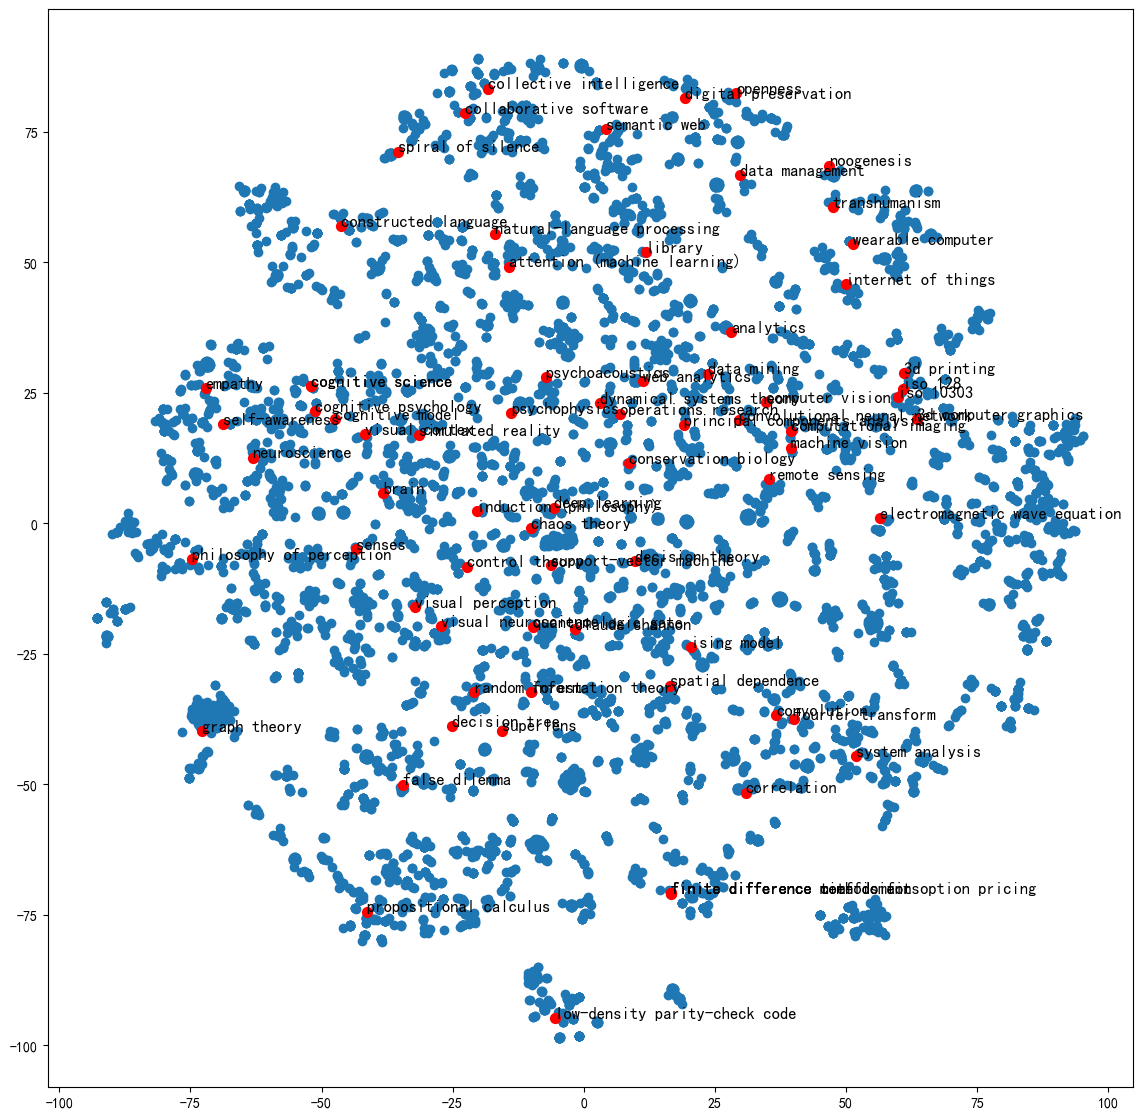

In [89]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])

for item in terms_chosen:
    idx = term2index[item]
    plt.scatter(embed_2d[idx,0], embed_2d[idx,1],c='r',s=50)
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=12)
plt.show()

In [90]:
embed_2d.shape

(8559, 2)

### 导出TSNE降维到二维之后的Embedding

In [91]:
terms_chosen_mask = np.zeros(X.shape[0])
for item in terms_chosen:
    idx = term2index[item]
    terms_chosen_mask[idx] = 1

In [92]:
df = pd.DataFrame()
df['X'] = embed_2d[:,0]
df['Y'] = embed_2d[:,1]
df['item'] = model.wv.index_to_key
df['pagerank'] = pagerank.values()
df['chosen'] = terms_chosen_mask

In [93]:
df

,X,Y,item,pagerank,chosen
0,-72.765564,-39.843243,graph theory,0.000289,1.0
1,-10.124823,-0.952521,chaos theory,0.000185,1.0
2,-1.626611,-20.306524,claude shannon,0.000173,1.0
3,-9.988382,-32.336193,information theory,0.000091,1.0
4,6.960749,20.964672,operations research,0.000083,1.0
...,...,...,...,...,...
8554,-54.127224,17.468899,indiana archives of cognitive science,0.000050,0.0
8555,-26.780354,6.610275,binding neuron,0.000051,0.0
8556,-33.646973,12.793405,autonomous agent,0.000051,0.0
8557,88.753838,3.765002,standard portable intermediate representation,0.000047,0.0


In [94]:
df.to_csv('tsne_vis_2d.csv',index=False)